## Importing Essential Libraries 

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [174]:
#Loading dataset

# from google.colab import drive
# drive.mount("/content/drive")

## Loading Dataset

Dataset will be assigned the variable (df)

In [175]:
#  Reading Dataset and displaying first 5 rows
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project/health_dataset.csv')
# df.head(5)
df= pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [177]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Preprocessing of Data

Dropping the unnecessary column i.e Patient ID 

In [178]:
df= df.drop(['id'], axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Exploring missing values 

In [179]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

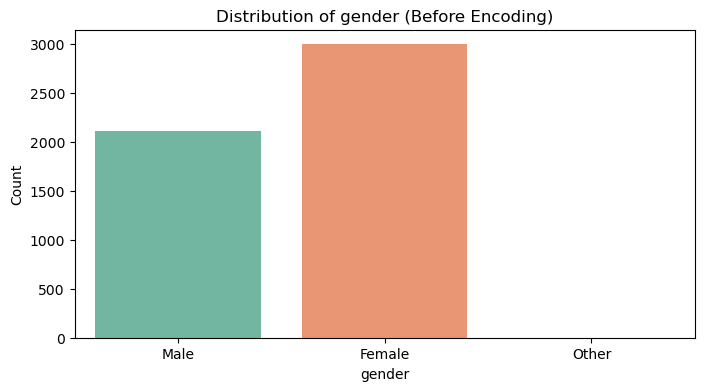

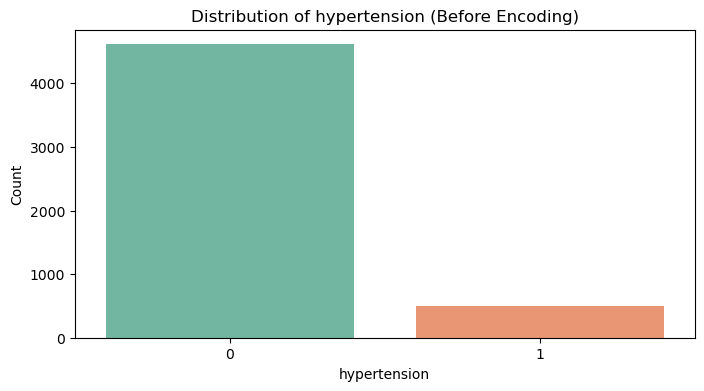

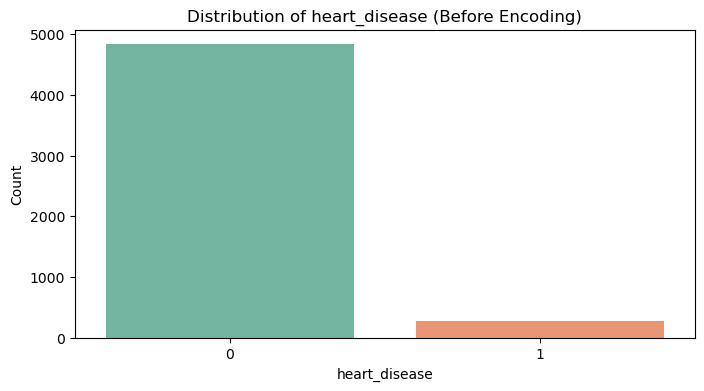

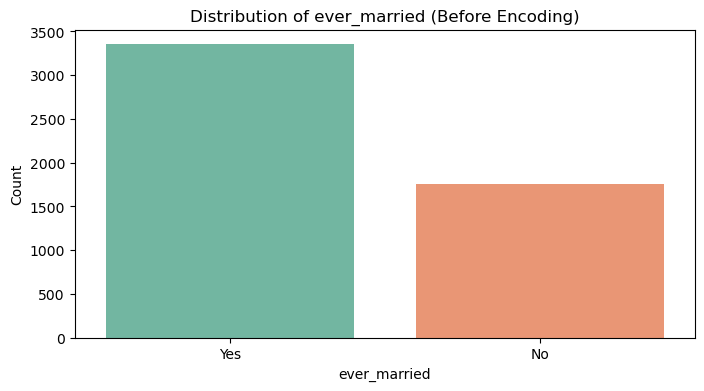

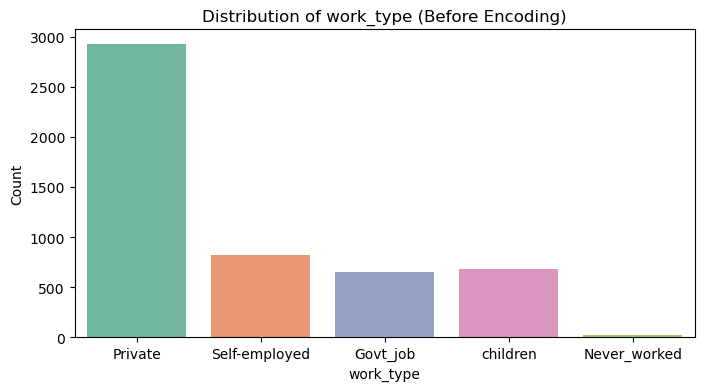

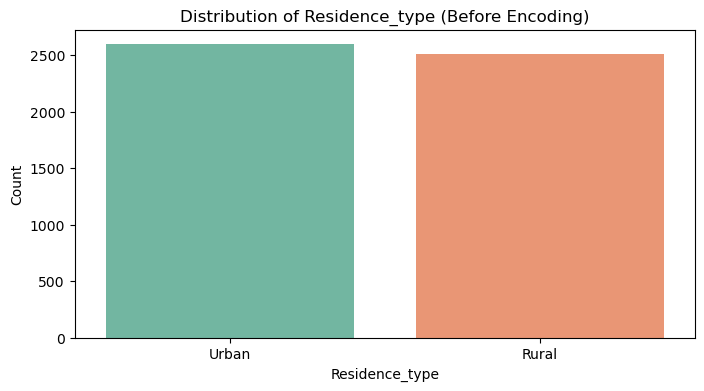

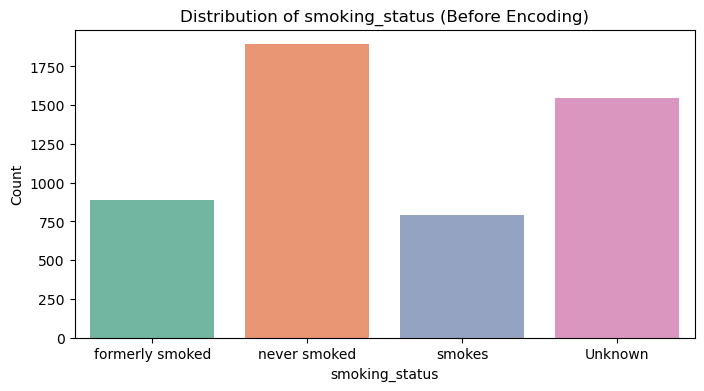

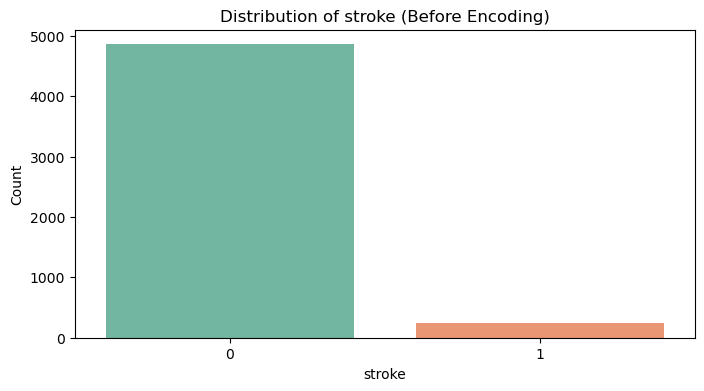

In [181]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status', 'stroke']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, palette='Set2')
    plt.title(f'Distribution of {feature} (Before Encoding)')
    plt.xlabel(feature)
    plt.ylabel('Count')
 
    plt.show()

  Enconding of Categorical features : Based on data type, Using OneHotEncoder was chosen

In [182]:
from sklearn.preprocessing import OneHotEncoder
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
categorical_data = df[categorical_variables]
encoder = OneHotEncoder(sparse_output = False)
encoded_data = encoder.fit_transform(categorical_data)
encoded_dataframe = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_variables))
df = pd.concat([df.drop(columns=categorical_variables), encoded_dataframe], axis=1)
df.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,202.21,NaN,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Handeling Missing Values in BMI, Using Linear regression to fill in missing values 

In [183]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df.head()
testdf = df[df['bmi'].isnull()==True]
traindf = df[df['bmi'].isnull()==False]
y = traindf['bmi']
traindf.drop("bmi",axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop("bmi",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['bmi']= pred
df = testdf



/var/folders/fj/pw9q52gs5p5d3wmrd3xgcm980000gn/T/ipykernel_99039/3984337551.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop("bmi",axis=1,inplace=True)
/var/folders/fj/pw9q52gs5p5d3wmrd3xgcm980000gn/T/ipykernel_99039/3984337551.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop("bmi",axis=1,inplace=True)
/var/folders/fj/pw9q52gs5p5d3wmrd3xgcm980000gn/T/ipykernel_99039/3984337551.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [184]:
df.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
bmi                               0
dtype: int64

In [185]:
df

,age,hypertension,heart_disease,avg_glucose_level,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi
1,61.0,0,0,202.21,1,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,31.143530
8,59.0,0,0,76.15,1,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,28.739718
13,78.0,0,1,219.84,1,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,30.618534
19,57.0,0,1,217.08,1,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,28.739845
27,58.0,0,0,189.84,1,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,31.158126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,41.0,0,0,70.15,0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,28.413353
5048,40.0,0,0,191.15,0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,32.826299
5093,45.0,1,0,95.02,0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,33.221105
5099,40.0,0,0,83.94,0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,30.648360


## Data Analysis 

Visulization to explore features distribution 

1. Visualization : Distribution  of numerical features

/Users/asmabashir/anaconda3/envs/my_f_e/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


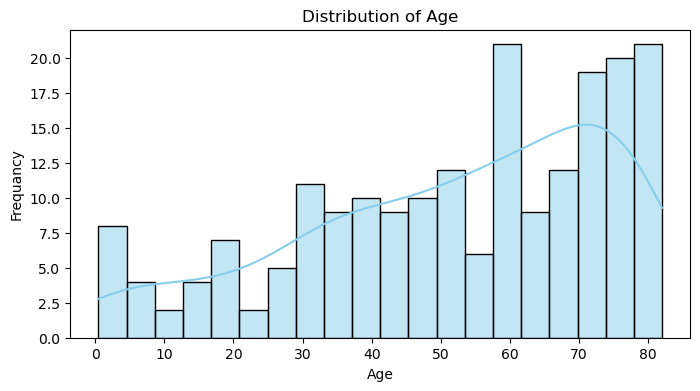

/Users/asmabashir/anaconda3/envs/my_f_e/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


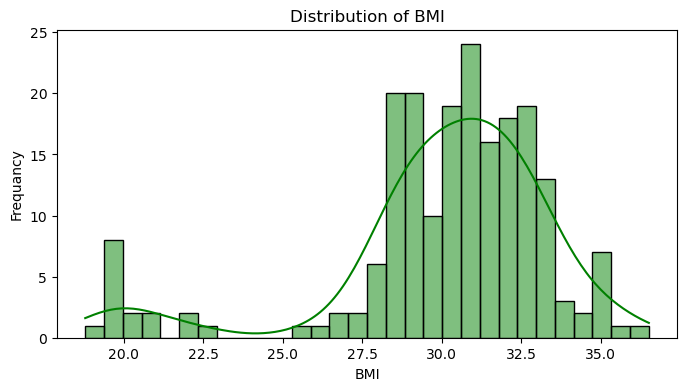

/Users/asmabashir/anaconda3/envs/my_f_e/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


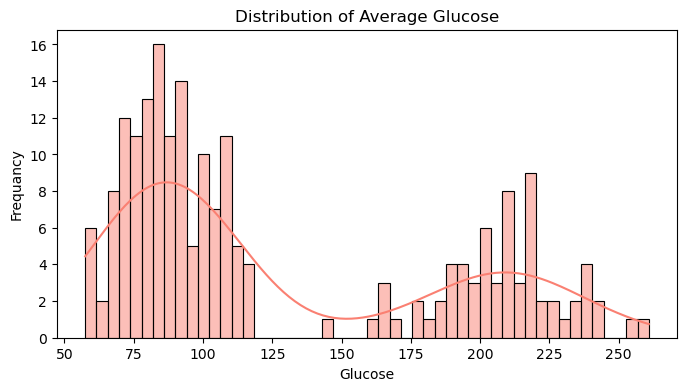

In [186]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'],bins=20, kde= True, color='skyblue' )
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequancy')
plt.show()
plt.figure(figsize=(8,4))
sns.histplot(df['bmi'],bins=30, kde= True, color='green' )
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequancy')
plt.show()
plt.figure(figsize=(8,4))
sns.histplot(df['avg_glucose_level'],bins=50, kde= True, color='salmon' )
plt.title('Distribution of Average Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequancy')
plt.show()

Exploring realtionship between : age,bmi,and avg_glucose_level & stroke 

Ploting target variable

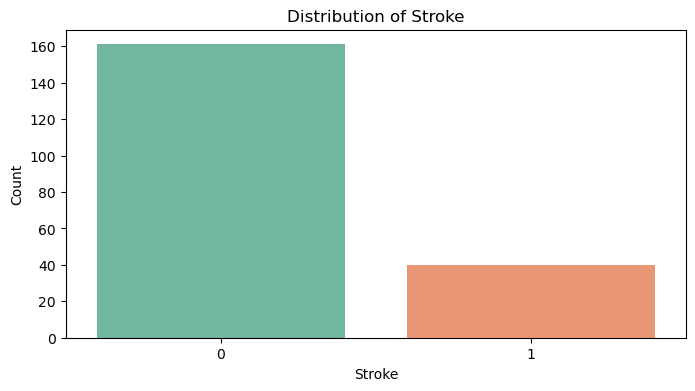

In [187]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='stroke', palette='Set2')
plt.title('Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

Relationship between 'age' and 'stroke'

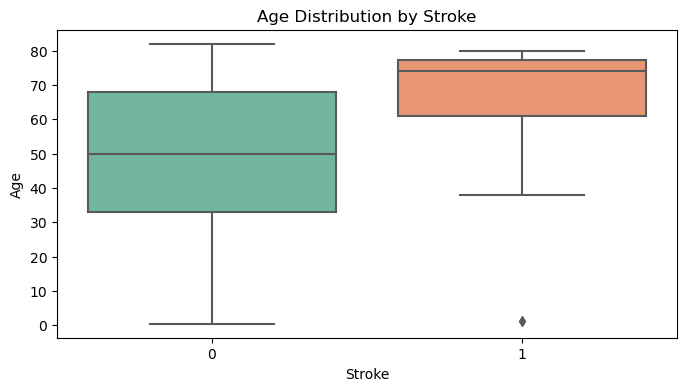

In [188]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='stroke', y='age', palette='Set2')
plt.title('Age Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

#Above plot shows possibility of outliers that will be further invistigated 

Relationship betweeen 'avg_glucose_level' and 'stroke'

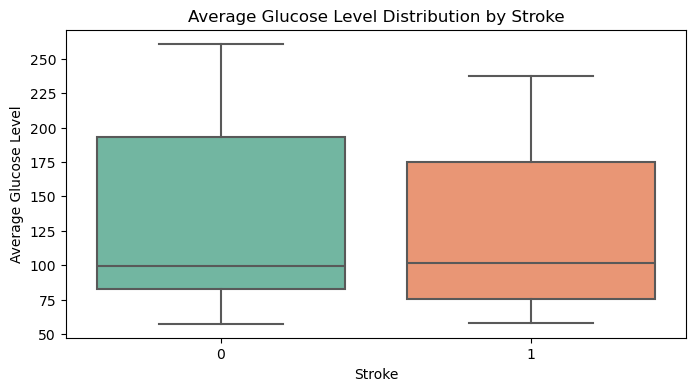

In [189]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='stroke', y='avg_glucose_level', palette='Set2')
plt.title('Average Glucose Level Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()

Relationship betweeen 'bmi' and 'stroke'

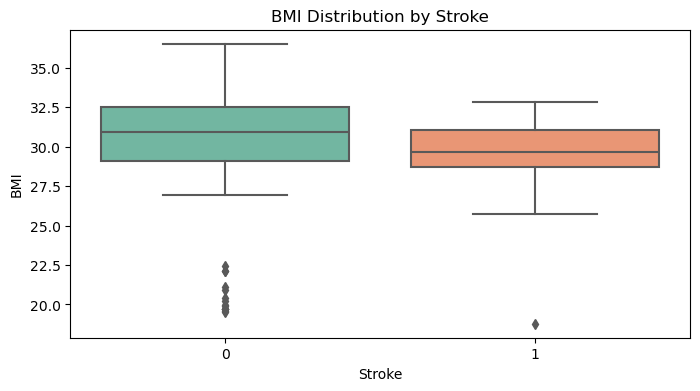

In [190]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='stroke', y='bmi', palette='Set2')
plt.title('BMI Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

2. Visualization : Distribution of Categorical features

Categorical features are : ('hypertension', 'heart_disease','gender_Female', 'gender_Male','gender_Other', 'ever_married_No',,'ever_married_Yes','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children', 'Residence_type_Rural','Residence_type_Urban','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked', 'smoking_status_smokes')


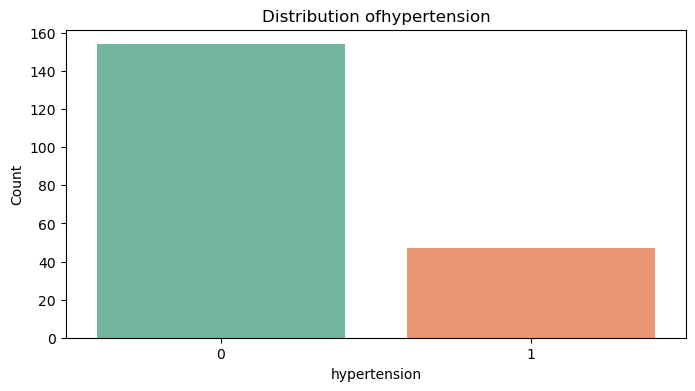

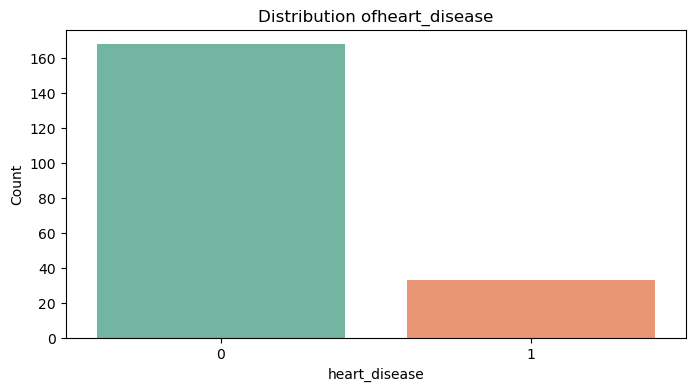

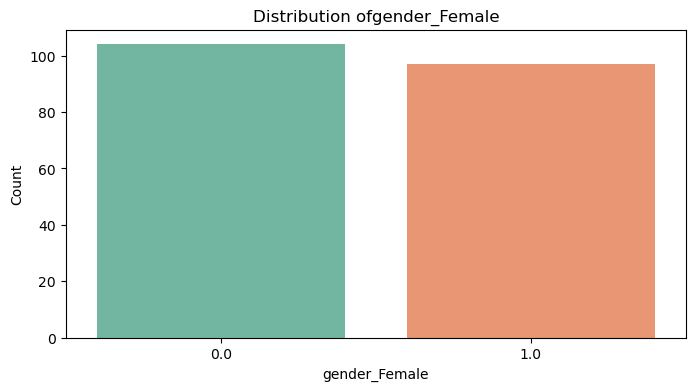

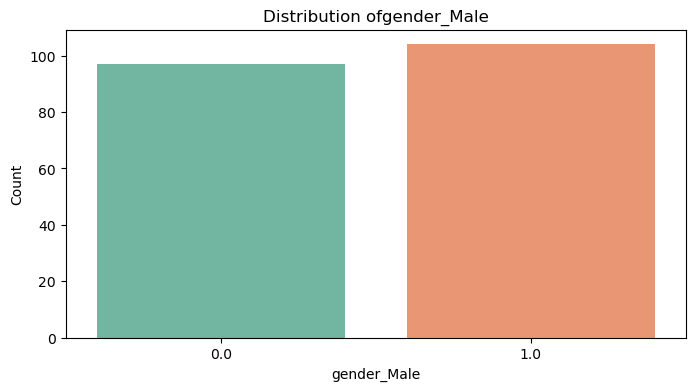

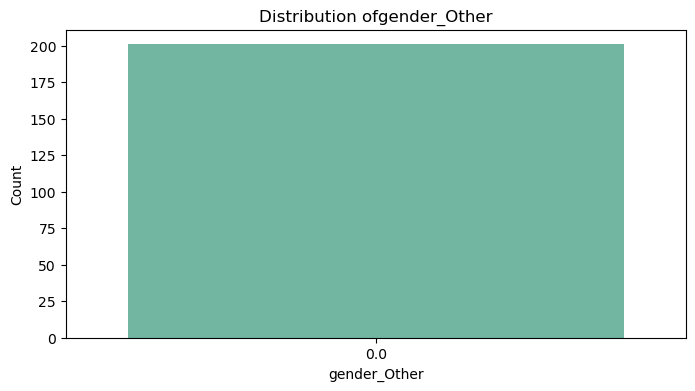

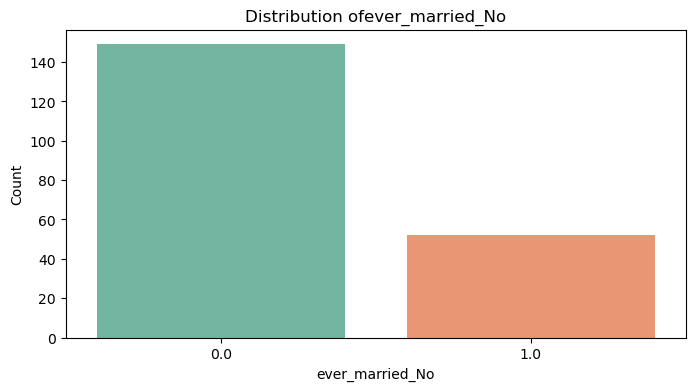

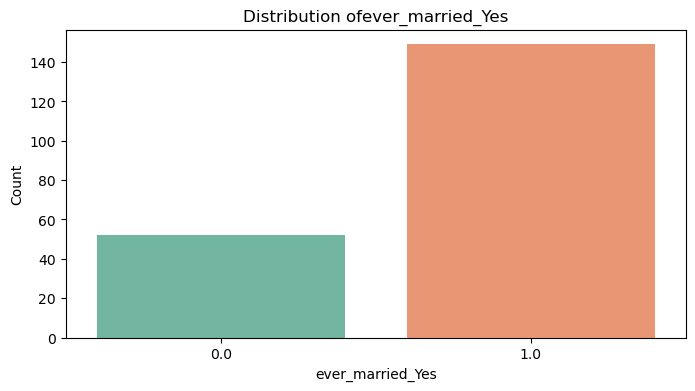

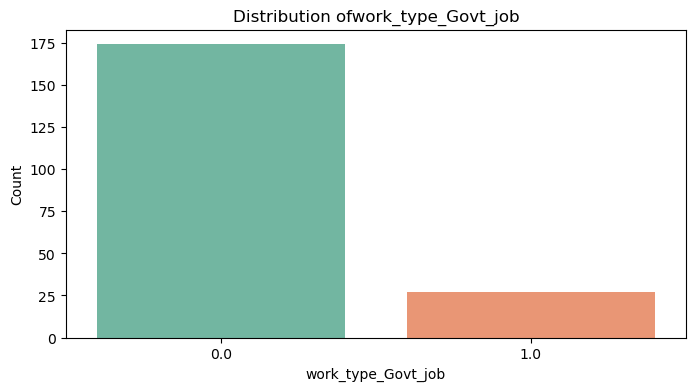

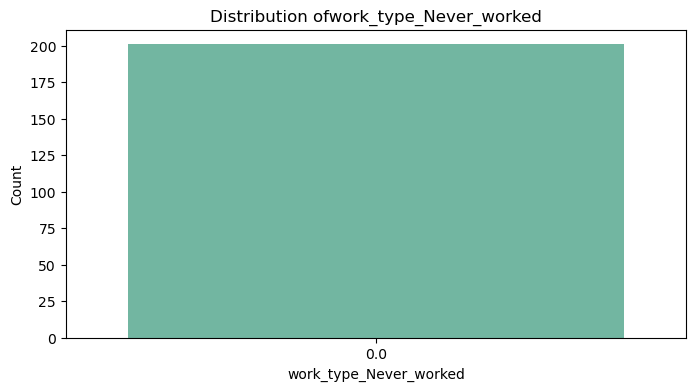

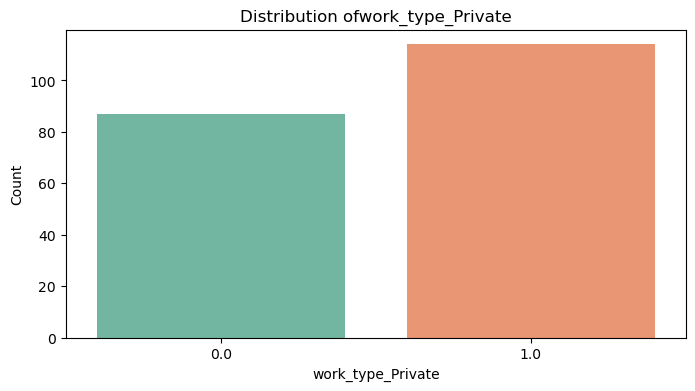

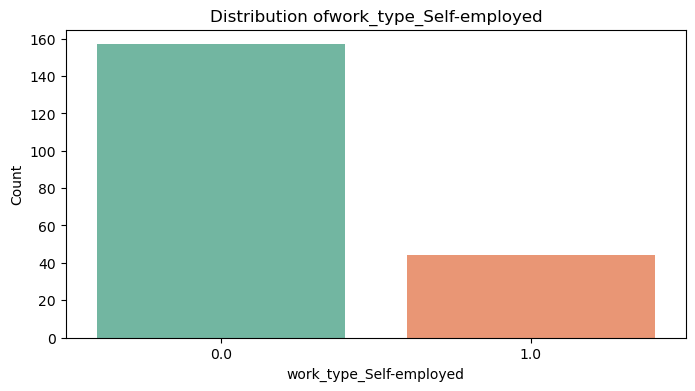

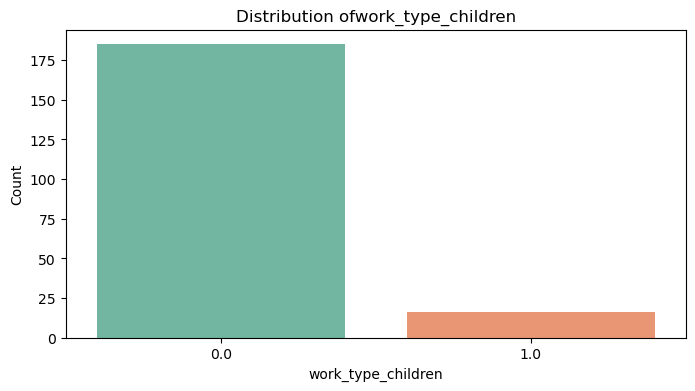

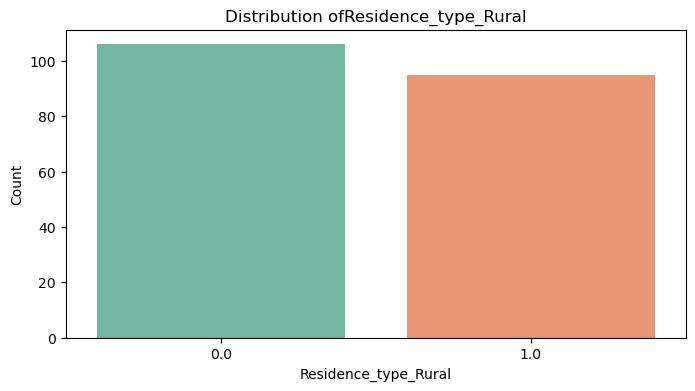

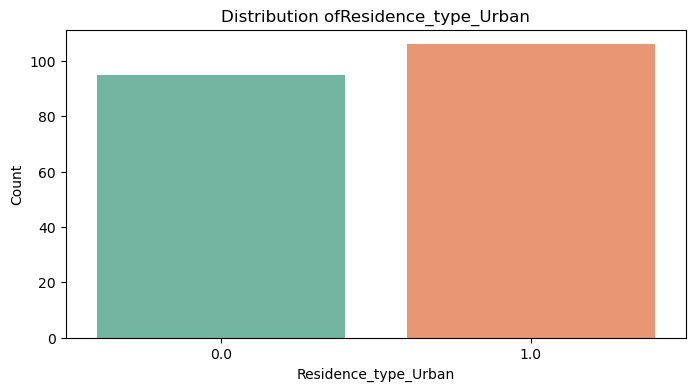

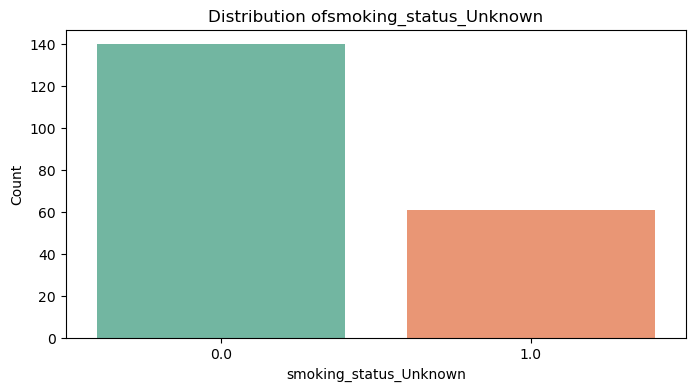

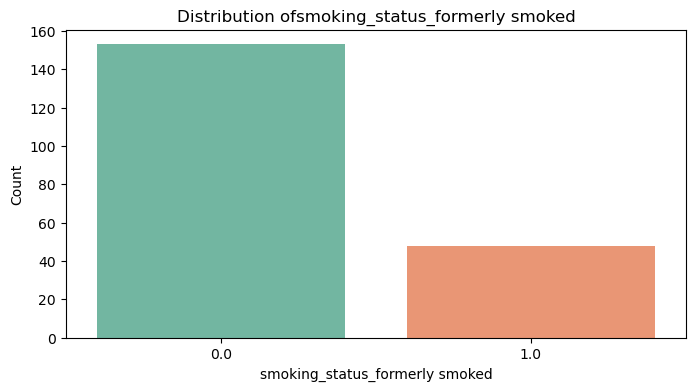

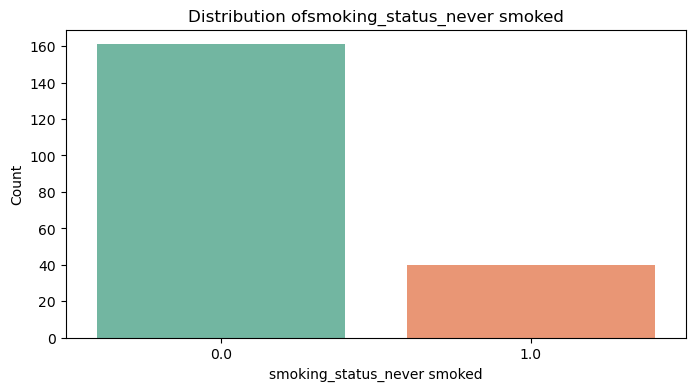

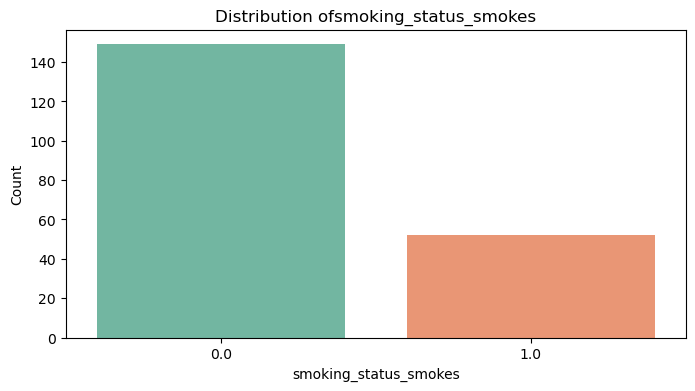

In [159]:
# categorical_features=['hypertension','heart_disease','gender_Female', 'gender_Male','gender_Other', 'ever_married_No','ever_married_Yes','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children', 'Residence_type_Rural','Residence_type_Urban','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked', 'smoking_status_smokes']
# for feature in categorical_features:
#     plt.figure(figsize=(8,4))
#     sns.countplot(data=df,x=feature,palette='Set2')
#     plt.title(f'Distribution of{feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Count')

    plt.show()

this turned out to be very confusing due to onehotencoder

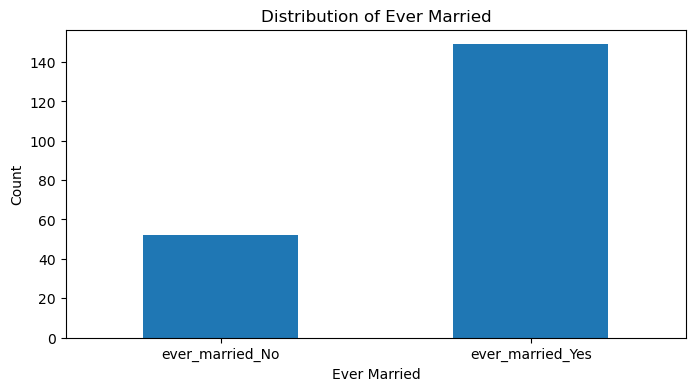

In [171]:
# encoded_counts_ever_married = df[['ever_married_No', 'ever_married_Yes']].sum()
# encoded_counts_ever_married.plot(kind='bar', stacked=True, figsize=(8, 4))
# plt.title('Distribution of Ever Married')
# plt.xlabel('Ever Married')
# plt.ylabel('Count')
# plt.xticks(rotation=0)
# plt.show()

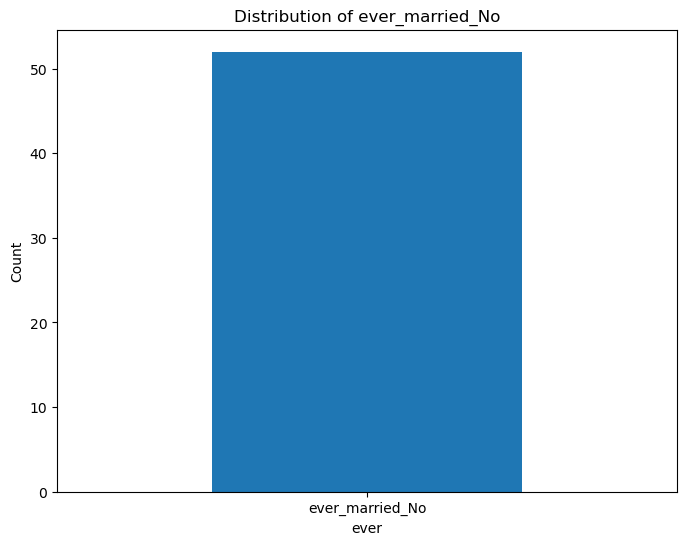

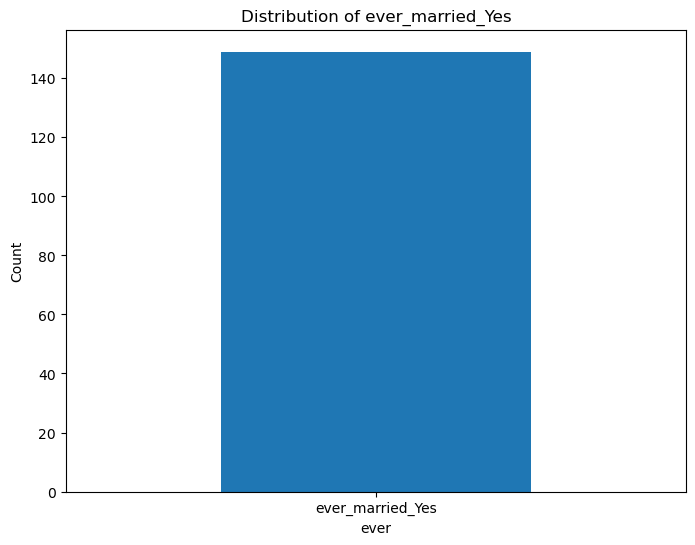

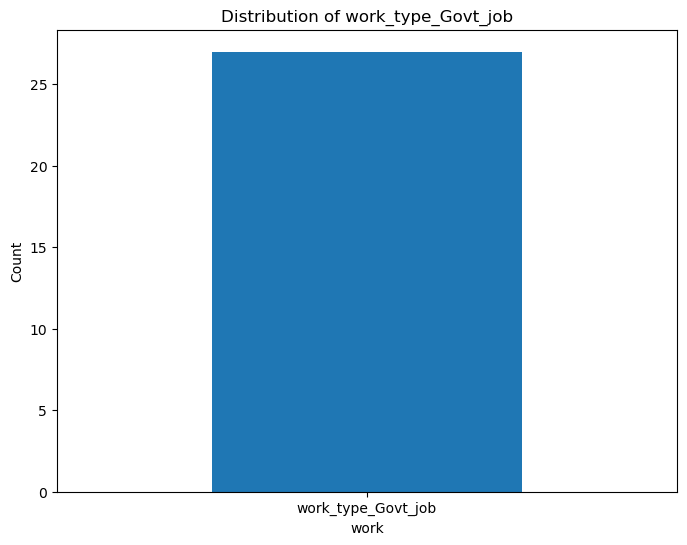

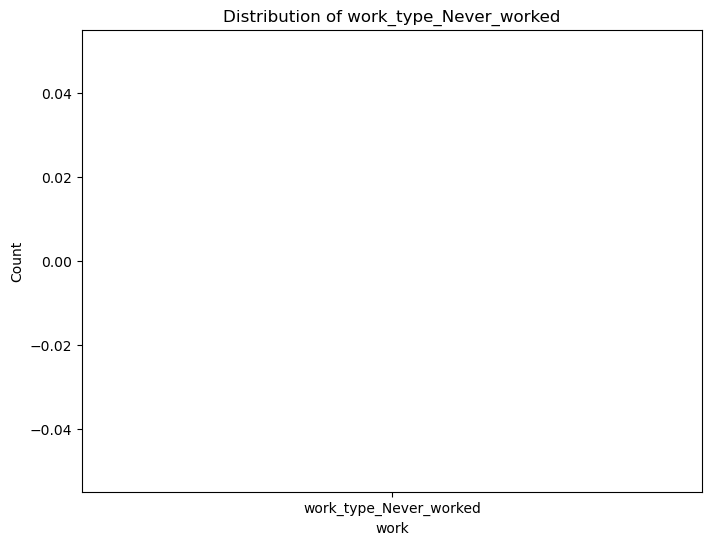

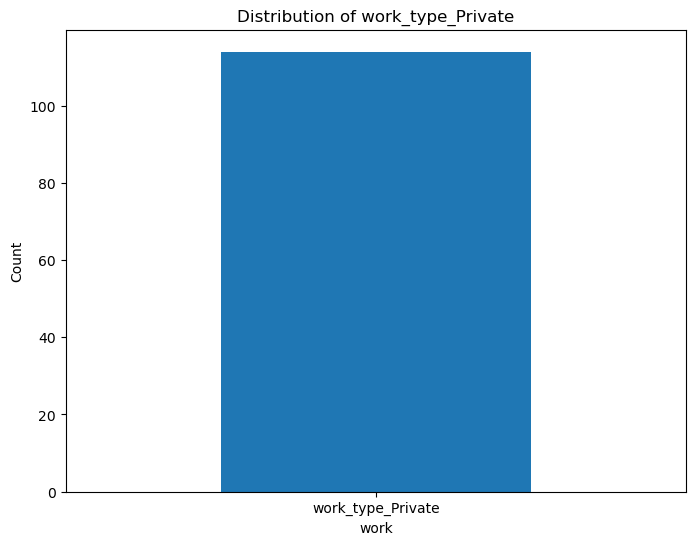

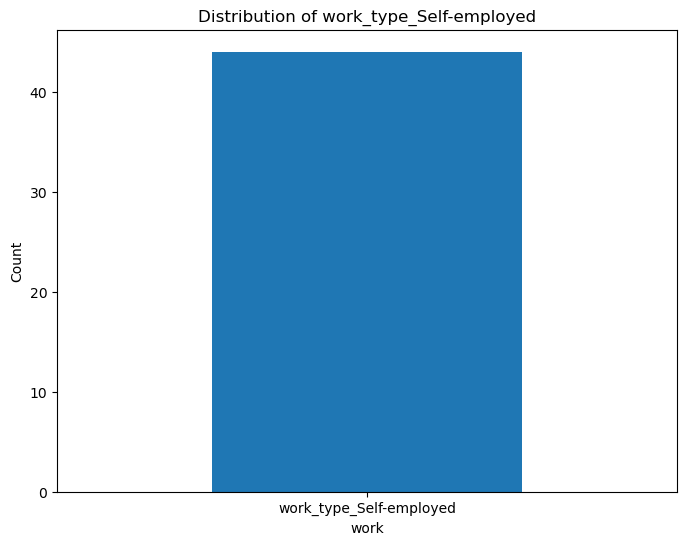

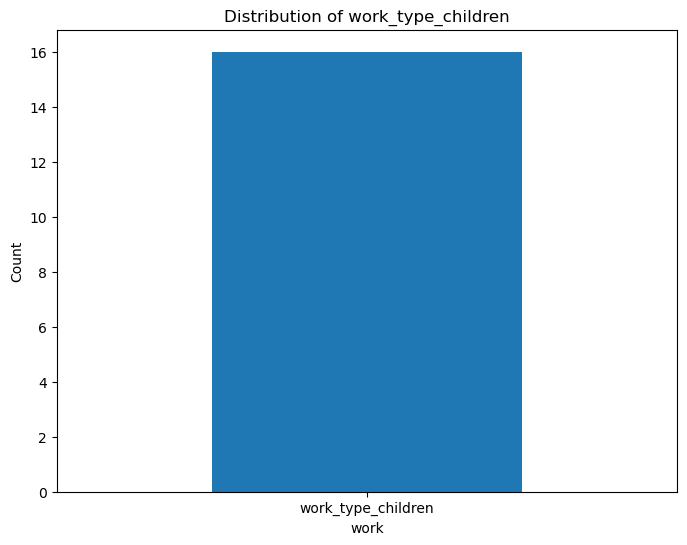

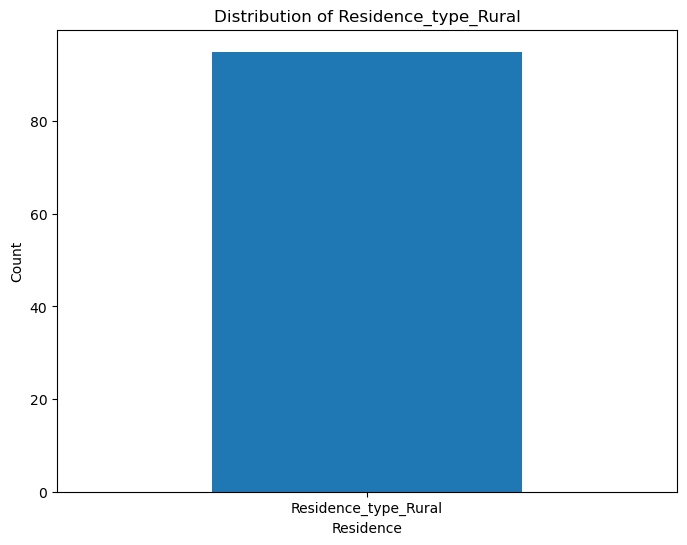

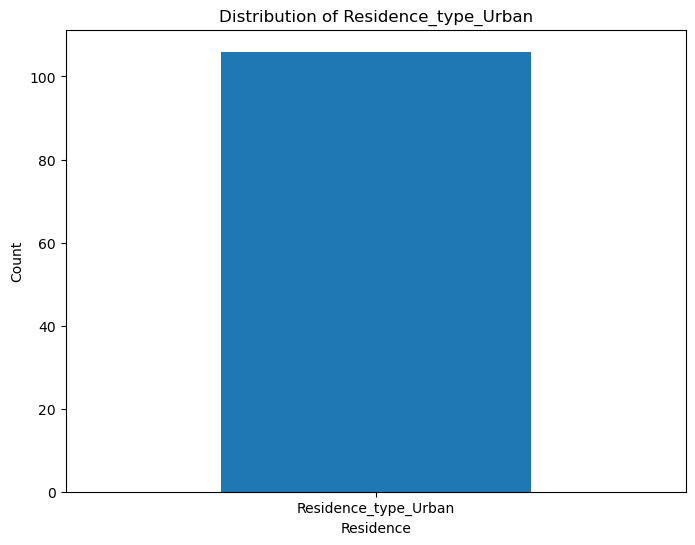

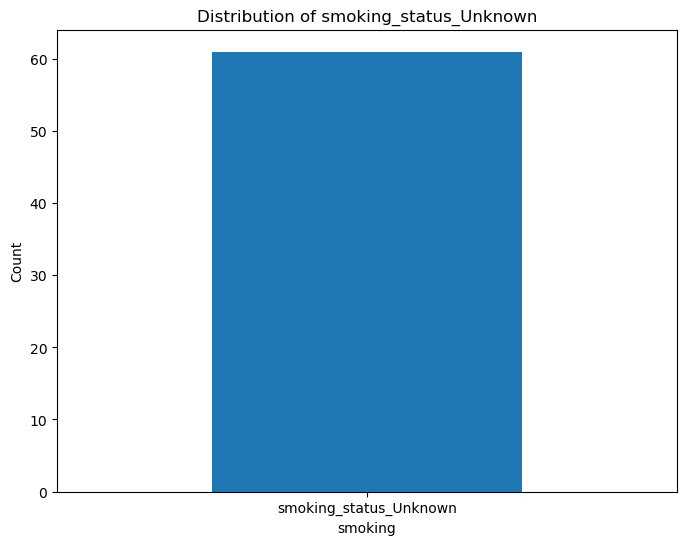

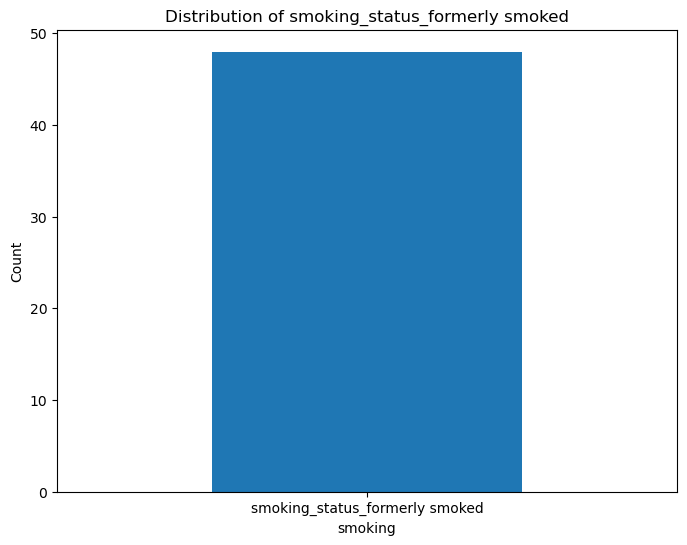

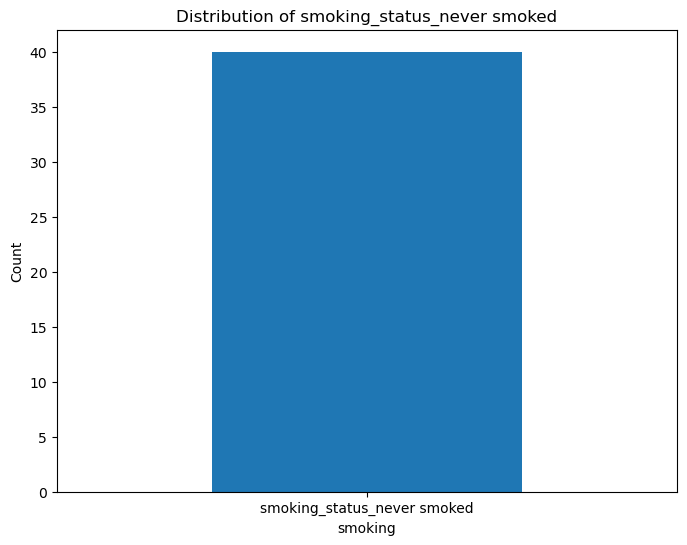

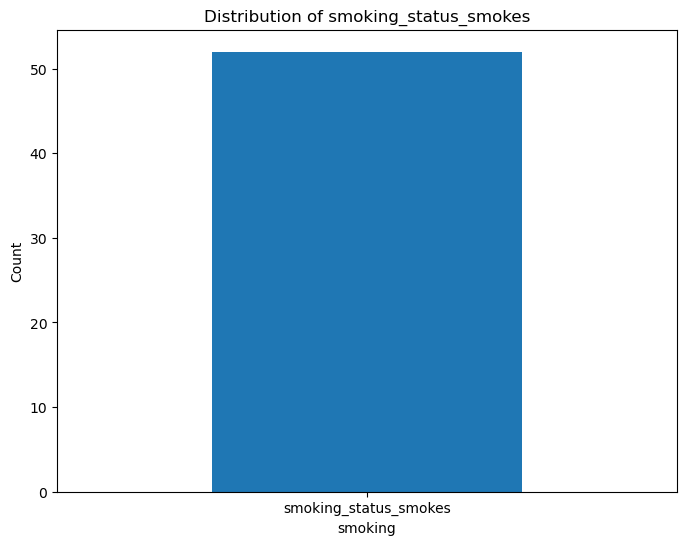

In [191]:

# one_hot_encoded_features = ['ever_married_No', 'ever_married_Yes', 'work_type_Govt_job','work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban','smoking_status_Unknown', 'smoking_status_formerly smoked','smoking_status_never smoked', 'smoking_status_smokes']

# for feature in one_hot_encoded_features:
#     # Create a DataFrame with counts for each category
#     encoded_counts = df[[feature]].sum()
    
#     # Plot a stacked bar plot
#     encoded_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
#     plt.title(f'Distribution of {feature}')
#     plt.xlabel(feature.split('_')[0])  # Extract the original feature name for x-axis label
#     plt.ylabel('Count')
#     plt.xticks(rotation=0)
   
#     plt.show()

Also, not very practicle , best is to stick with plotting categorical data before encoding.
